<a href="https://colab.research.google.com/github/shreya-25/Loan-Prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings 
warnings.filterwarnings("ignore")

### **Loading The Dataset**

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
test_original= test.copy()
train_original= train.copy()

In [4]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
for i in train.columns:
  print(i, train[i].nunique())


Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2
Property_Area 3
Loan_Status 2


In [7]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [8]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

### **Univariate Analysis**

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

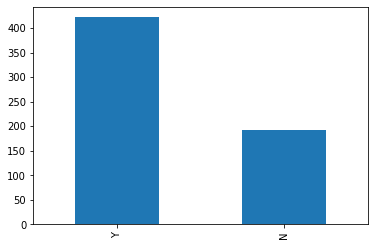

In [5]:
train['Loan_Status'].value_counts().plot.bar()

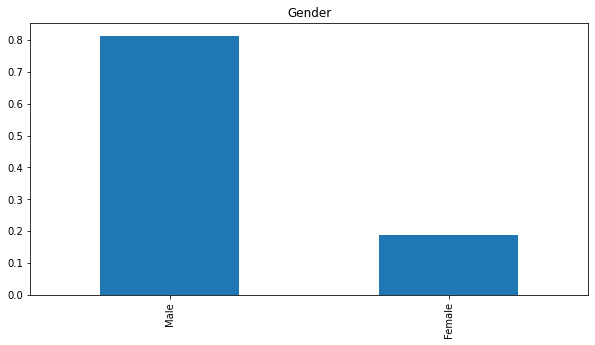

In [13]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Gender') 

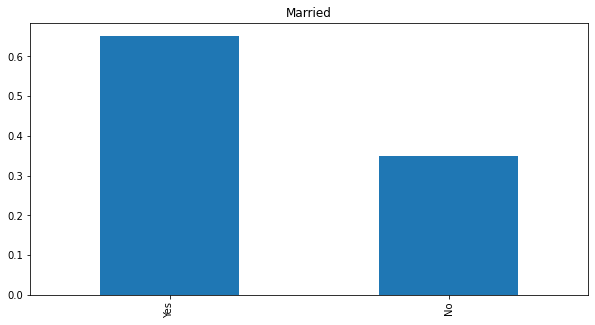

In [14]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,5),title= 'Married') 

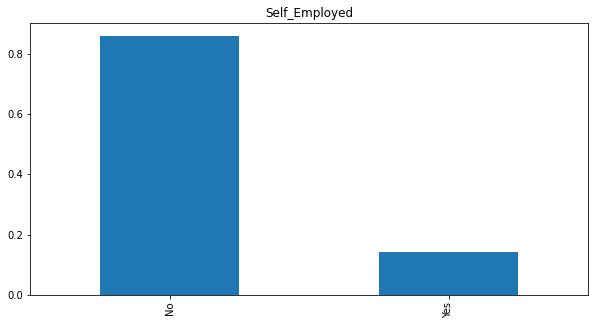

In [15]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,5),title= 'Self_Employed') 

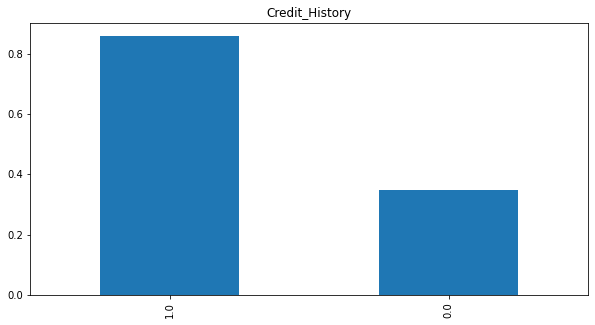

In [11]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,5),title= 'Credit_History') 
plt.show()

**It can be inferred from the above bar plots that**-

80% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% applicants in the dataset are self employed.

Around 85% applicants have repaid their debts.

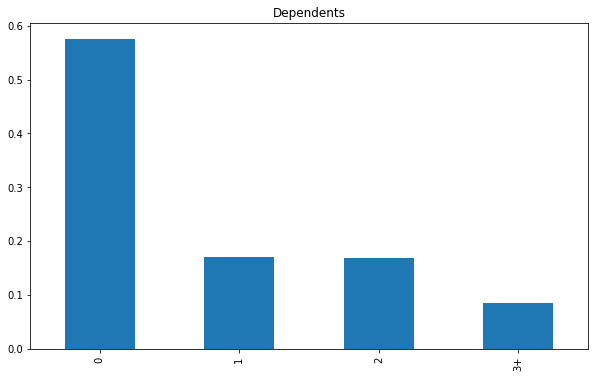

In [22]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,6), title= 'Dependents') 

plt.show()

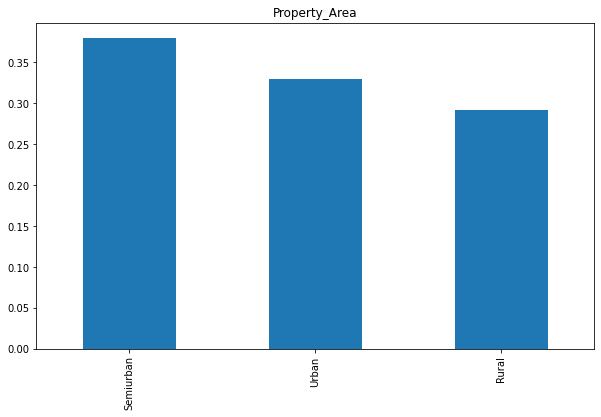

In [20]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,6),title= 'Property_Area')

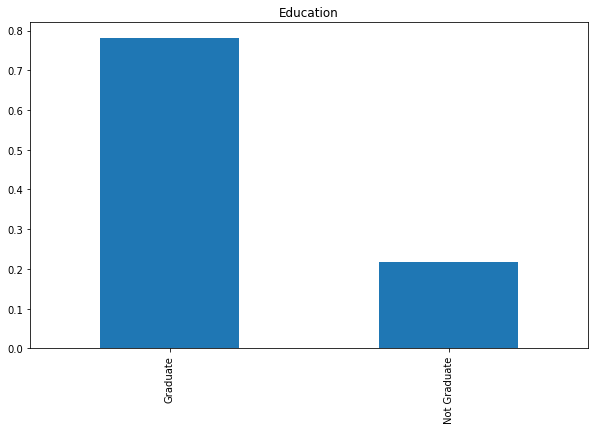

In [21]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(10,6),title= 'Education') 

**Following inferences can be made from the above bar plots:**

Most of the applicants don’t have any dependents.

Around 80% of the applicants are Graduate.

Most of the applicants are from Semiurban area.

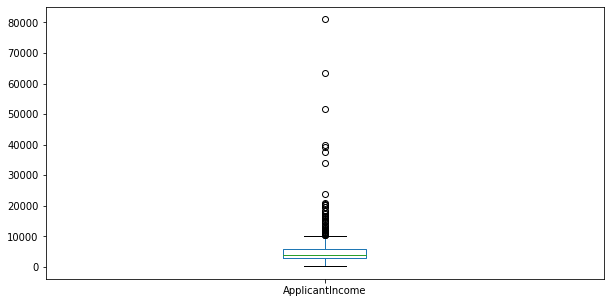

In [23]:
train['ApplicantIncome'].plot.box(figsize=(10,5)) 
plt.show()

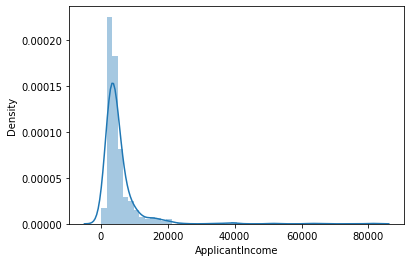

In [7]:
sns.distplot(train['ApplicantIncome']); 

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

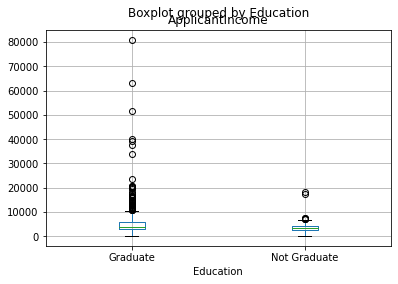

In [27]:
train.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

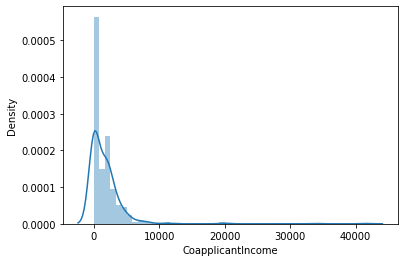

In [30]:
sns.distplot(train['CoapplicantIncome']); 

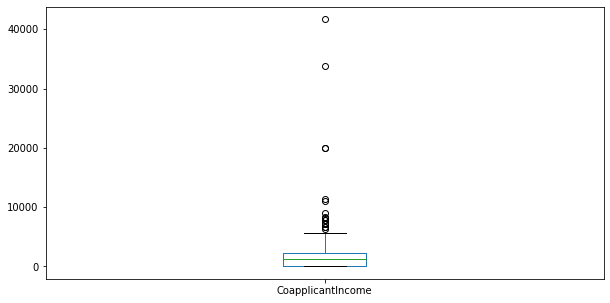

In [32]:
train['CoapplicantIncome'].plot.box(figsize=(10,5))

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

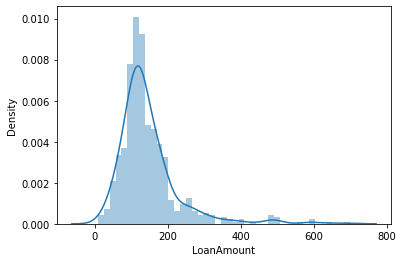

In [34]:
sns.distplot(train['LoanAmount']);


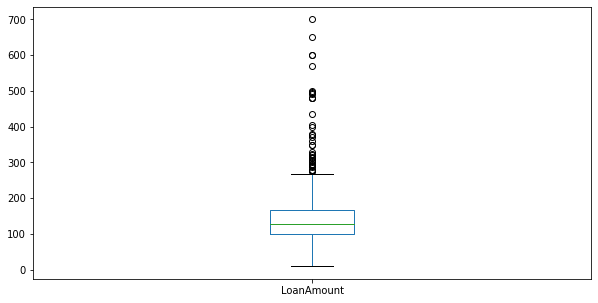

In [36]:
train['LoanAmount'].plot.box(figsize=(10,5)) 

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

### **Bivariate Analysis**